In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
coord_list = []

with open('processed_table', 'rb') as f:
    coord_list = pickle.load(f)

def compute_distance(x, y, metric='l1'):
    if metric == "l1":
        return np.linalg.norm((np.array(x) - np.array(y)), ord=1)
    else:
        raise Exception('Unknown metric')
        
number_of_paths = len(coord_list)
distance_matrix = np.zeros((number_of_paths, number_of_paths))
for i in range(number_of_paths):
    for j in range(i, number_of_paths):
        distance = compute_distance(coord_list[i], coord_list[j], 'l1')
        distance_matrix[i][j] = distance
        distance_matrix[j][i] = distance

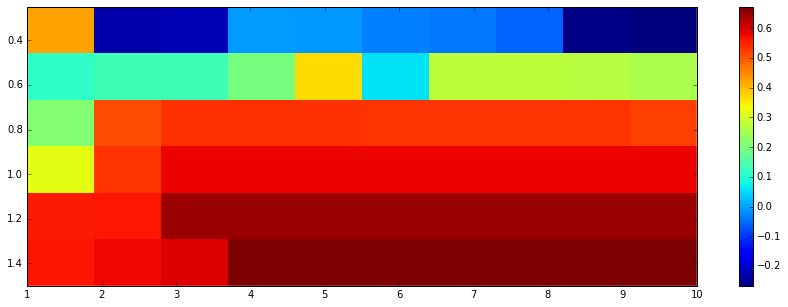

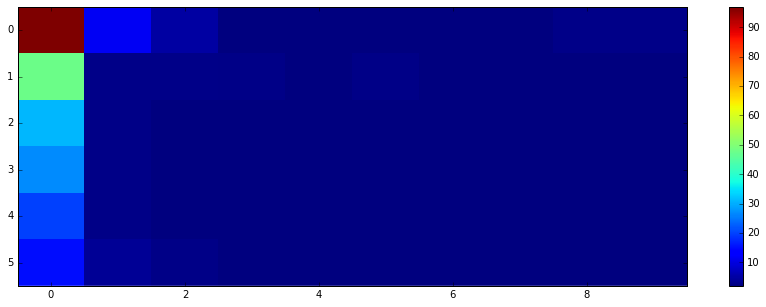

In [3]:
epsilon_range = np.arange(0.25, 1.55, 0.25) # y
min_sample_range = np.arange(1, 11, 1) # x
quality_matrix = np.zeros((len(epsilon_range), len(min_sample_range)))
cluster_count_matrix = np.zeros((len(epsilon_range), len(min_sample_range)))

for min_sample_index, min_sample_size in enumerate(min_sample_range):
    for eps_index, eps in enumerate(epsilon_range):
        clustering_algorithm = DBSCAN(eps=eps, min_samples=min_sample_size, metric='precomputed')
        labels = clustering_algorithm.fit_predict(distance_matrix)
        cluster_count_matrix[eps_index][min_sample_index] = len(set(clustering_algorithm.labels_))
        if len(set(clustering_algorithm.labels_)) > 1:
            quality_matrix[eps_index][min_sample_index] = silhouette_score(np.array(coord_list), labels)

# Plotting
plt.figure(figsize=(15, 5))
plt.imshow(quality_matrix, interpolation='none', aspect="auto",
           extent=[np.min(min_sample_range), np.max(min_sample_range), np.max(epsilon_range), np.min(epsilon_range)])
plt.colorbar()
plt.figure(figsize=(15, 5))
plt.imshow(cluster_count_matrix, aspect="auto", interpolation='none')
plt.colorbar()

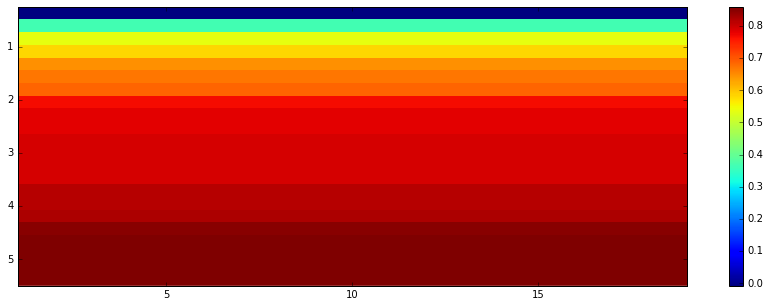

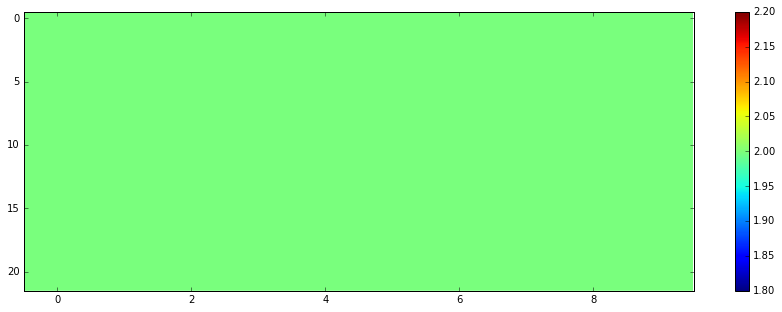

In [11]:
epsilon_range = np.arange(0.25, 5.55, 0.25) # y
leaf_size_range = np.arange(1, 20, 2) # x
quality_matrix = np.zeros((len(epsilon_range), len(leaf_size_range)))
cluster_count_matrix = np.zeros((len(epsilon_range), len(leaf_size_range)))

for leaf_size_index, leaf_size in enumerate(leaf_size_range):
    for eps_index, eps in enumerate(epsilon_range):
        clustering_algorithm = DBSCAN(eps=eps, leaf_size=leaf_size, metric='precomputed')
        labels = clustering_algorithm.fit_predict(distance_matrix)
        cluster_count_matrix[eps_index][leaf_size_index] = len(set(clustering_algorithm.labels_))
        if len(set(clustering_algorithm.labels_)) > 1:
            quality_matrix[eps_index][leaf_size_index] = silhouette_score(np.array(coord_list), labels)

# Plotting
plt.figure(figsize=(15, 5))
plt.imshow(quality_matrix, interpolation='none', aspect="auto",
           extent=[np.min(leaf_size_range), np.max(leaf_size_range), np.max(epsilon_range), np.min(epsilon_range)])
plt.colorbar()
plt.figure(figsize=(15, 5))
plt.imshow(cluster_count_matrix, aspect="auto", interpolation='none')
plt.colorbar()